# Random Forest

In [10]:
import importlib
import dataset_loader
importlib.reload(dataset_loader)

<module 'dataset_loader' from 'C:\\Users\\Alfred\\PycharmProjects\\Pythonprojects\\Machine Learning\\Loan-approval\\dataset_loader.py'>

In [1]:
from sklearn.ensemble import RandomForestClassifier
from dataset_loader import load_dataset
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

In [2]:
dataset = load_dataset('loan_data.csv')

train_data, test_data, train_labels, test_labels = train_test_split(dataset, dataset['loan_status'], train_size=0.7, random_state=1)
train_data.drop(columns=['loan_status'], inplace=True)
test_data.drop(columns=['loan_status'], inplace=True)

In [3]:
classifier = RandomForestClassifier(n_estimators=100, random_state=1)
classifier.fit(train_data, train_labels)

params = {
    'n_estimators': np.arange(20,200,10),
    'max_depth': np.arange(1,8,1),
}

random_search = RandomizedSearchCV(classifier, param_distributions=params, n_iter=30, cv=5, random_state=11)

random_search.fit(train_data, train_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
                   n_iter=30,
                   param_distributions={'max_depth': array([1, 2, 3, 4, 5, 6, 7]),
                                        'n_estimators': array([ 20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130, 140,
       150, 160, 170, 180, 190])},
                   random_state=11)

In [4]:
tuned_classifier = random_search.best_estimator_
prediction = tuned_classifier.predict(test_data)
print(accuracy_score(test_labels, prediction))

0.9174692547044007


              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10492
           1       0.90      0.70      0.79      3006

    accuracy                           0.92     13498
   macro avg       0.91      0.84      0.87     13498
weighted avg       0.92      0.92      0.91     13498



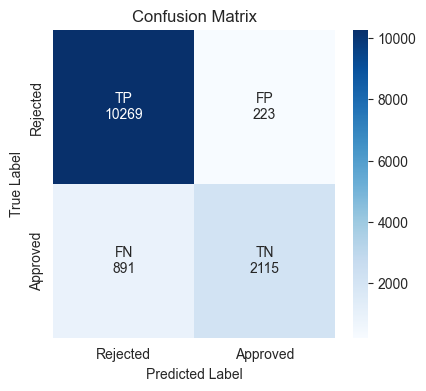

In [26]:
import matplotlib.pyplot as plt
import seaborn


cm = confusion_matrix(test_labels, prediction)
clf_report = classification_report(test_labels, prediction)


entries = np.array([[f'TP\n{cm[0][0]}', f'FP\n{cm[0][1]}'],
                    [f'FN\n{cm[1][0]}', f'TN\n{cm[1][1]}']])

plt.figure(figsize=(10, 4))

# Confusion Matrix
plt.subplot(1, 2, 1)
seaborn.heatmap(cm, annot=entries, fmt='', cmap='Blues', xticklabels=['Rejected', 'Approved'], yticklabels=['Rejected', 'Approved'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

print(clf_report)